### Importanto bibliotecas, dados e primeiras análises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sépala  150 non-null    float64
 1   largura_sépala      150 non-null    float64
 2   comprimento_pétala  150 non-null    float64
 3   largura_pétala      150 non-null    float64
 4   espécie             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Gerando gráfico de dispersão

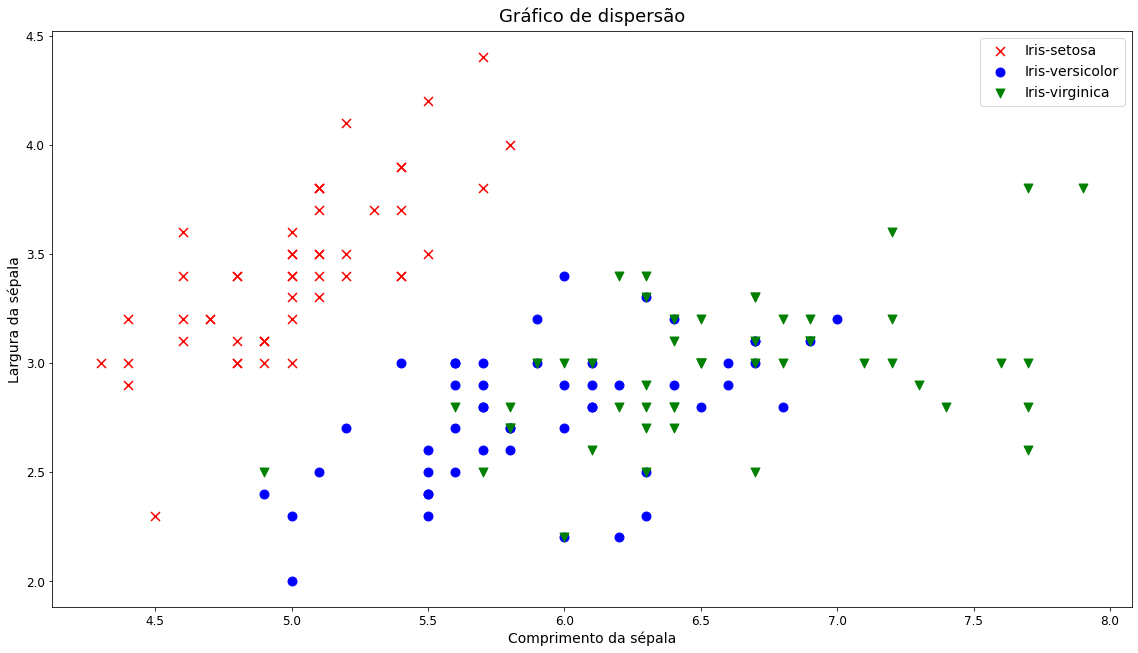

In [16]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])

#Separando espécies por cores e marcadores diferentes
cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}

for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    ax.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'], color = cores[especie], marker = marcadores[especie], s = 80)
    
ax.set_title('Gráfico de dispersão', fontsize = 18, pad = 10)
ax.set_xlabel('Comprimento da sépala', fontsize = 14)
ax.set_ylabel('Largura da sépala', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.legend(cores, fontsize = 14)

### Gerando gráfico de distribuição usando o boxplot

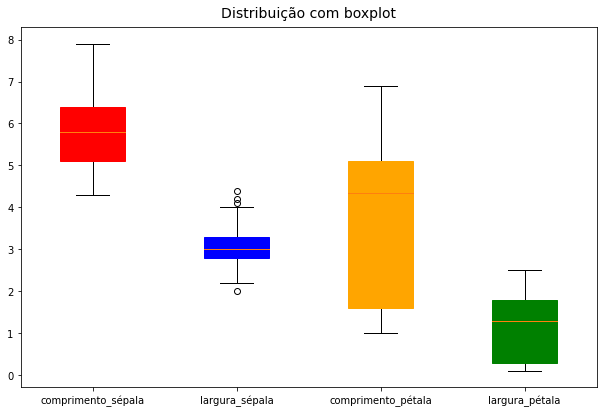

In [27]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'orange', 'green']

caixas = ax.boxplot(df.drop('espécie', axis = 1), patch_artist = True)
ax.set_title('Distribuição com boxplot', fontsize = 14, pad = 10)
ax.set_xticklabels(df.drop('espécie', axis =1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)

### Gerando visualização com histograma

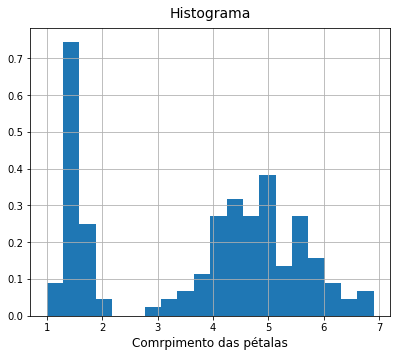

In [33]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

ax.hist(df['comprimento_pétala'], bins = 20, density = True)
ax.set_title('Histograma', fontsize = 14, pad = 10)
ax.set_xlabel('Comrpimento das pétalas', fontsize = 12)
ax.grid(True)

Plotando o mesmo gráfico com anotações de média e desvio padrão

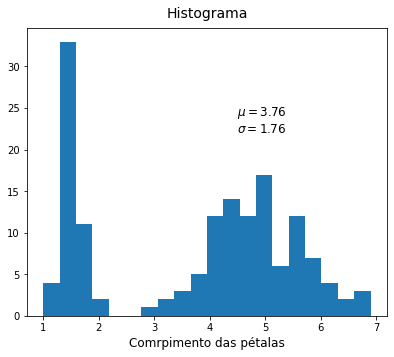

In [56]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

mu, sigma = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std()

ax.hist(df['comprimento_pétala'], bins = 20)
ax.set_title('Histograma', fontsize = 14, pad = 10)
ax.set_xlabel('Comrpimento das pétalas', fontsize = 12)

ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma), xy=(4.5,22), fontsize = 12)

#Salvando a imagem
fig.savefig('Histograma Íris.png', bbox_inches = 'tight')